In [9]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cluster, preprocessing, mixture #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
import cv2

from features.affine_base import affine_detect

In [10]:
img_path="/home/cde/.ghq/bitbucket.org/internship18uec_nectec/train_marker/data/raw/marker_mugcup.png"
mask_path="/home/cde/.ghq/bitbucket.org/internship18uec_nectec/train_marker/data/raw/mask_mugcup.png"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
detector = cv2.ORB_create()

In [12]:
%time
keypoints, descriptions = affine_detect(detector, gray, mask)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs
1278


In [16]:
ref_keypoints, ref_desc = detector.detectAndCompute(gray, mask) #reference system

In [17]:
len(ref_keypoints)

500

In [19]:
pts = np.array([kp.pt for kp in ref_keypoints], np.float32).reshape(-1, 2)

In [20]:
train_pts = np.array([kp.pt for kp in keypoints], np.float32).reshape(-1, 2)

In [21]:
sc=preprocessing.StandardScaler()
sc.fit(pts)
X_norm=sc.transform(pts)

<function matplotlib.pyplot.show(*args, **kw)>

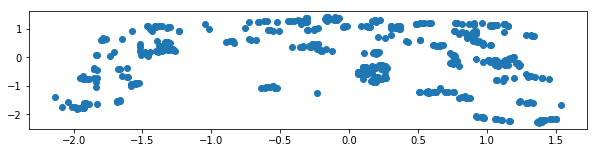

In [23]:
# 4：プロットしてみる------------------------------------------
%matplotlib inline
 
x=X_norm[:,0]
y=X_norm[:,1]
#z=df_wine["class"]
plt.figure(figsize=(10,10))
plt.subplot(4, 1, 1)
plt.scatter(x,y)
plt.show

In [33]:
# 解説7：VBGMMを実施---------------------------------
vbgm = mixture.BayesianGaussianMixture(n_components=int(len(pts)/2))

vbgm=vbgm.fit(X_norm)
labels=vbgm.predict(X_norm)

/home/cde/.ghq/bitbucket.org/internship18uec_nectec/train_marker/.venv/lib/python3.5/site-packages/sklearn/mixture/base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


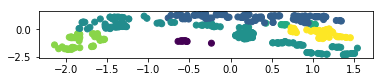

In [34]:
# 8: 結果をプロット-----------------------------------------------
plt.subplot(4, 1, 3)
plt.scatter(x,y, c=labels)